In [57]:
from sstadex import Macromodel, Primitive, dfs, simplediffpair, cs_pmos, cm_pmos, spice_sim
import numpy as np
from sympy import Symbol
from sympy.solvers import solve
import matplotlib.pyplot as plt
import paretoset as pareto
import pandas as pd
from sympy import lambdify
import matplotlib.ticker as ticker

In [58]:
from sstadex import Transistor
import seaborn as sns
sns.set_theme()
sns.color_palette("mako")

[(0.18195582, 0.11955283, 0.23136943),
 (0.25307401, 0.23772973, 0.48316271),
 (0.21607792, 0.39736958, 0.61948028),
 (0.20344718, 0.56074869, 0.65649508),
 (0.25187832, 0.71827158, 0.67872193),
 (0.54578602, 0.8544913, 0.69848331)]

In [59]:
lengths = [0.4e-06, 0.8e-06, 1.6e-06, 3.2e-06, 6.4e-6]

# gmid

In [ ]:
vgs_explore = np.linspace(0.07, 1.6, 40)

sky_transistor = Transistor(
            "../../LUTs/sky130A_LUT_01v8.npy",
            "nmos",
            0,
            1,
            (0, 1.8, 0.01),
            [0.4e-06, 0.8e-06, 1.6e-06, 3.2e-06, 6.4e-6],
            ['length', 'vgs'],
            [
                lengths,
                vgs_explore,
            ],
        )

dict = {}
dict["vgs"]=np.tile(vgs_explore, 5)
dict["Lengths"]=np.repeat(lengths, len(vgs_explore))
dict["gmid"]=sky_transistor.gmid.flatten()
dict["gds"]=sky_transistor.gds.flatten()
dict["jd"]=sky_transistor.jd.flatten()/1e6
dict["vov"]=dict["vgs"]-sky_transistor.vth.flatten()
dict["gmd"]=dict["gmid"]*dict["jd"]
dict["gdsid"]=dict["gds"]/sky_transistor.id.flatten()
dict["gain"]=20*np.log10(dict["gmid"]/dict["gdsid"])
dict["fT"]=((dict["gmid"]*sky_transistor.id.flatten())/sky_transistor.cgg.flatten())/(2e9*np.pi)


df_sky = pd.DataFrame.from_dict(dict)

fig, axs = plt.subplots(1, 2, figsize=(18, 5))
sns.lineplot(ax=axs[0], data=df_sky, x="vov", y="gmid", hue="Lengths", palette="flare")
sns.lineplot(ax=axs[1], data=df_sky, x="vov", y="gmd", hue="Lengths", palette="flare")

axs[0].locator_params(axis='both', nbins=10) 
axs[0].set_title(r"Eficiencia de transconductancia", fontsize=15)
axs[0].set_xlabel(r"Vgs-Vth [V]")
axs[0].set_ylabel(r"gm/Id [S/A]")
axs[1].locator_params(axis='both', nbins=10) 
axs[1].set_xlabel(r"Vgs-Vth [V]")
axs[1].set_ylabel(r"gm/W [S/um]")
axs[1].set_title(r"Densidad de transconductancia", fontsize=15)
axs[1].ticklabel_format(style='sci', axis='y', scilimits=(0, 0), useMathText=True)
#fig.suptitle(r"Sky130A: nmos_01v8", fontsize=24, y=1.1)

plt.savefig('sd_sky1.svg', format='svg', dpi=1200)

In [ ]:
vgs_explore = np.linspace(0.1, 2.6, 40)

ihp_transistor = Transistor(
            "../../LUTs/IHP_LUT_hv.npy",
            "nmos",
            0,
            2,
            (0, 3.3, 0.01),
            [0.4e-06, 0.8e-06, 1.6e-06, 3.2e-06, 6.4e-6],
            ['length', 'vgs'],
            [
                lengths,
                vgs_explore,
            ],
        )

dict = {}
dict["vgs"]=np.tile(vgs_explore, 5)
dict["Lengths"]=np.repeat(lengths, len(vgs_explore))
dict["gmid"]=ihp_transistor.gmid.flatten()
dict["gds"]=ihp_transistor.gds.flatten()
dict["jd"]=ihp_transistor.jd.flatten()/1e6
dict["vov"]=dict["vgs"]-ihp_transistor.vth.flatten()
dict["gmd"]=dict["gmid"]*dict["jd"]
dict["gdsid"]=dict["gds"]/ihp_transistor.id.flatten()
dict["gain"]=20*np.log10(dict["gmid"]/dict["gdsid"])
dict["fT"]=((dict["gmid"]*ihp_transistor.id.flatten())/ihp_transistor.cgg.flatten())/(2e9*np.pi)

df_ihp = pd.DataFrame.from_dict(dict)

fig, axs = plt.subplots(1, 2, figsize=(18, 5))
sns.lineplot(ax=axs[0], data=df_ihp, x="vov", y="gmid", hue="Lengths", palette="flare")
sns.lineplot(ax=axs[1], data=df_ihp, x="vov", y="gmd", hue="Lengths", palette="flare")

axs[0].locator_params(axis='both', nbins=10) 
axs[0].set_title(r"Eficiencia de transconductancia", fontsize=15)
axs[0].set_xlabel(r"Vgs-Vth [V]")
axs[0].set_ylabel(r"gm/Id [S/A]")
axs[1].locator_params(axis='both', nbins=10) 
axs[1].set_xlabel(r"Vgs-Vth [V]")
axs[1].set_ylabel(r"gm/W [S/um]")
axs[1].set_title(r"Densidad de transconductancia", fontsize=15)
axs[1].ticklabel_format(style='sci', axis='y', scilimits=(0, 0), useMathText=True)
#fig.suptitle(r"IHP-sg13g2: hv_nmos", fontsize=24, y=1.1)

plt.savefig('sd_ihp1.svg', format='svg', dpi=1200)

In [ ]:
vgs_explore = np.linspace(0.2, 2.7, 40)

gf_transistor = Transistor(
            "../../LUTs/gf_LUT_03v3.npy",
            "nmos",
            0,
            2,
            (0, 3.3, 0.01),
            [0.4e-06, 0.8e-06, 1.6e-06, 3.2e-06, 6.4e-6],
            ['length', 'vgs'],
            [
                lengths,
                vgs_explore,
            ],
        )

dict = {}
dict["vgs"]=np.tile(vgs_explore, 5)
dict["Lengths"]=np.repeat(lengths, len(vgs_explore))
dict["gmid"]=gf_transistor.gmid.flatten()
dict["gds"]=gf_transistor.gds.flatten()
dict["jd"]=gf_transistor.jd.flatten()/1e6
dict["vov"]=dict["vgs"]-gf_transistor.vth.flatten()
dict["gmd"]=dict["gmid"]*dict["jd"]
dict["gdsid"]=dict["gds"]/gf_transistor.id.flatten()
dict["gain"]=20*np.log10(dict["gmid"]/dict["gdsid"])
dict["fT"]=((dict["gmid"]*gf_transistor.id.flatten())/gf_transistor.cgg.flatten())/(2e9*np.pi)

df_gf = pd.DataFrame.from_dict(dict)

fig, axs = plt.subplots(1, 2, figsize=(18, 5))
sns.lineplot(ax=axs[0], data=df_gf, x="vov", y="gmid", hue="Lengths", palette="flare")
sns.lineplot(ax=axs[1], data=df_gf, x="vov", y="gmd", hue="Lengths", palette="flare")

axs[0].locator_params(axis='both', nbins=10) 
axs[0].set_title(r"Eficiencia de transconductancia", fontsize=15)
axs[0].set_xlabel(r"Vgs [V]")
axs[0].set_ylabel(r"gm/Id [S/A]")
axs[1].locator_params(axis='both', nbins=10) 
axs[1].set_xlabel(r"Vgs [V]")
axs[1].set_ylabel(r"Id/W [A/um]")
axs[1].set_title(r"Densidad de corriente", fontsize=15)
axs[1].ticklabel_format(style='sci', axis='y', scilimits=(0, 0), useMathText=True)
#fig.suptitle(r"GF180mcuD: nmos_03v3", fontsize=24, y=1.1)

plt.savefig('sd_gf1.svg', format='svg', dpi=1200)

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
sns.lineplot(ax=axs[0], data=df_sky, x="gmid", y="gain", hue="Lengths", palette="flare")
sns.lineplot(ax=axs[1], data=df_gf, x="gmid", y="gain", hue="Lengths", palette="flare")
sns.lineplot(ax=axs[2], data=df_ihp, x="gmid", y="gain", hue="Lengths", palette="flare")

axs[0].locator_params(axis='both', nbins=10) 
axs[0].set_title(r"Ganancia intrínseca sky130_nmos_01v8", fontsize=15)
axs[0].set_xlabel(r"gm/Id [S/A]")
axs[0].set_ylabel(r"gm/gds [db]")
axs[1].locator_params(axis='both', nbins=10) 
axs[1].set_xlabel(r"gm/Id [S/A]")
axs[1].set_ylabel(r"gm/gds [db]")
axs[1].set_title(r"Ganancia intrínseca gf180_nmos_03v3", fontsize=15)
axs[2].locator_params(axis='both', nbins=10) 
axs[2].set_title(r"Ganancia intrínseca ihp-sg13g2_nmos_hv", fontsize=15)
axs[2].set_xlabel(r"gm/Id [S/A]")
axs[2].set_ylabel(r"gm/gds [db]")
#fig.suptitle(r"Ganancias intrínsecas", fontsize=24, y=1.1)

plt.savefig('sd_gain.svg', format='svg', dpi=1200)

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
sns.lineplot(ax=axs[0], data=df_sky, x="gmid", y="fT", hue="Lengths", palette="flare")
sns.lineplot(ax=axs[1], data=df_gf, x="gmid", y="fT", hue="Lengths", palette="flare")
sns.lineplot(ax=axs[2], data=df_ihp, x="gmid", y="fT", hue="Lengths", palette="flare")

axs[0].locator_params(axis='both', nbins=10) 
axs[0].set_title(r"Frecuencia de tránsito sky130_nmos_01v8", fontsize=15)
axs[0].set_xlabel(r"gm/Id [S/A]")
axs[0].set_ylabel(r"$f_T$ [GHz]")
axs[1].locator_params(axis='both', nbins=10) 
axs[1].set_xlabel(r"gm/Id [S/A]")
axs[1].set_ylabel(r"$f_T$[GHz]")
axs[1].set_title(r"Frecuencia de tránsito gf180_nmos_03v3", fontsize=15)
axs[2].locator_params(axis='both', nbins=10) 
axs[2].set_title(r"Frecuencia de tránsito ihp-sg13g2_nmos_hv", fontsize=15)
axs[2].set_xlabel(r"gm/Id [S/A]")
axs[2].set_ylabel(r"$f_T$ [GHz]")

plt.savefig('sd_fT.svg', format='svg', dpi=1200)

# Example

Conditions:

1. gain > 40dB
2. Id < 20uA

Optimization:

1. ID, W, L minimize
2. GBW maximize

In [317]:
vgs_explore = np.linspace(0.1, 2.6, 100)

ihp_transistor = Transistor(
            "../../LUTs/IHP_LUT_hv.npy",
            "nmos",
            0,
            1.2,
            (0, 3.3, 0.01),
            [0.4e-06, 0.8e-06, 1.6e-06, 3.2e-06, 6.4e-6],
            ['length', 'vgs'],
            [
                lengths,
                vgs_explore,
            ],
        )

dict = {}
dict["vgs"]=np.tile(vgs_explore, 5)
dict["Lengths"]=np.repeat(lengths, len(vgs_explore))
dict["gmid"]=ihp_transistor.gmid.flatten()
dict["gds"]=ihp_transistor.gds.flatten()
dict["gdsid"]=dict["gds"]/ihp_transistor.id.flatten()
dict["cgg"] = ihp_transistor.cgg.flatten()
dict["jd"]=ihp_transistor.jd.flatten()/1e6
dict["vov"]=dict["vgs"]-ihp_transistor.vth.flatten()
dict["gmd"]=dict["gmid"]*dict["jd"]
dict["gain"]=20*np.log10(dict["gmid"]/dict["gdsid"])

df_ihp = pd.DataFrame.from_dict(dict)

length
vgs
0


In [318]:
id_sweep = np.linspace(1e-6, 20e-6, 30)
sweep_size = len(id_sweep)

In [319]:
new_df = df_ihp.copy()
new_df_size = len(new_df)
new_df  

,vgs,Lengths,gmid,gds,gdsid,cgg,jd,vov,gmd,gain
0,0.100000,4.000000e-07,25.579670,5.490647e-12,0.639241,1.708151e-15,1.717865e-12,-0.476415,4.394243e-11,32.044612
1,0.125253,4.000000e-07,25.837959,1.061380e-11,0.645580,1.669665e-15,3.288142e-12,-0.451227,8.495888e-11,32.046161
2,0.150505,4.000000e-07,26.074581,2.062840e-11,0.651428,1.633717e-15,6.333286e-12,-0.426041,1.651378e-10,32.047016
3,0.175758,4.000000e-07,26.292724,4.029198e-11,0.656835,1.600513e-15,1.226852e-11,-0.400858,3.225728e-10,32.047589
4,0.201010,4.000000e-07,26.494793,7.906777e-11,0.661862,1.569018e-15,2.389256e-11,-0.375678,6.330283e-10,32.047867
...,...,...,...,...,...,...,...,...,...,...
495,2.498990,6.400000e-06,0.882064,2.696627e-05,0.190181,1.163043e-13,2.835849e-05,1.924584,2.501400e-05,13.326644
496,2.524242,6.400000e-06,0.859009,2.925313e-05,0.201823,1.169743e-13,2.898882e-05,1.949668,2.490165e-05,12.580517
497,2.549495,6.400000e-06,0.836428,3.162590e-05,0.213572,1.176249e-13,2.961610e-05,1.974752,2.477172e-05,11.857666
498,2.574747,6.400000e-06,0.814328,3.407893e-05,0.225391,1.182713e-13,3.023988e-05,1.999836,2.462517e-05,11.157266


In [320]:
dict = {}

dict["gm"] = np.dot(new_df["gmid"].values.reshape(new_df_size,1), id_sweep.reshape(1,sweep_size)).flatten()
dict["gds_2"] = np.repeat(new_df["gds"].values, sweep_size).flatten()
dict["gdsid"] = np.repeat(new_df["gdsid"].values, sweep_size).flatten()
dict["gds"] = np.dot(new_df["gdsid"].values.reshape(new_df_size,1), id_sweep.reshape(1,sweep_size)).flatten()
dict["gain"] = 20*np.log10(dict["gm"]/dict["gds"]).flatten()
dict["id"] = np.tile(id_sweep, new_df_size).flatten()*1e6
dict["gmid"] = np.repeat(new_df["gmid"].values, sweep_size).flatten()
dict["W"] = np.dot(1/new_df["jd"].values.reshape(new_df_size,1), id_sweep.reshape(1,sweep_size)).flatten()
dict["L"] = np.repeat(new_df["Lengths"].values, sweep_size).flatten()*1e6
dict["area"] = dict["W"]+dict["L"]
dict["gbw"] = (dict["gm"]/(1e-12*2*np.pi))/1e6
dict["vgs"] = np.repeat(new_df["vgs"].values, sweep_size).flatten()
dict["cgg"] = (np.repeat(new_df["cgg"].values, sweep_size).flatten()*dict["W"])/5
dict["fT"] = (dict["gm"]/dict["cgg"])/(2e6*np.pi)

example_df = pd.DataFrame.from_dict(dict)

In [321]:
example_df

,gm,gds_2,gdsid,gds,gain,id,gmid,W,L,area,gbw,vgs,cgg,fT
0,0.000026,5.490647e-12,0.639241,6.392406e-07,32.044612,1.000000,25.579670,5.821178e+05,0.4,5.821182e+05,4.071131,0.1,1.988690e-10,0.020471
1,0.000042,5.490647e-12,0.639241,1.058053e-06,32.044612,1.655172,25.579670,9.635053e+05,0.4,9.635057e+05,6.738424,0.1,3.291626e-10,0.020471
2,0.000059,5.490647e-12,0.639241,1.476866e-06,32.044612,2.310345,25.579670,1.344893e+06,0.4,1.344893e+06,9.405716,0.1,4.594561e-10,0.020471
3,0.000076,5.490647e-12,0.639241,1.895679e-06,32.044612,2.965517,25.579670,1.726280e+06,0.4,1.726281e+06,12.073009,0.1,5.897496e-10,0.020471
4,0.000093,5.490647e-12,0.639241,2.314492e-06,32.044612,3.620690,25.579670,2.107668e+06,0.4,2.107668e+06,14.740301,0.1,7.200431e-10,0.020471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.000014,3.660626e-05,0.237243,4.123115e-06,10.478470,17.379310,0.792714,5.631708e-01,6.4,6.963171e+00,2.192649,2.6,1.339240e-14,163.723408
14996,0.000014,3.660626e-05,0.237243,4.278550e-06,10.478470,18.034483,0.792714,5.844014e-01,6.4,6.984401e+00,2.275308,2.6,1.389727e-14,163.723408
14997,0.000015,3.660626e-05,0.237243,4.433985e-06,10.478470,18.689655,0.792714,6.056321e-01,6.4,7.005632e+00,2.357968,2.6,1.440214e-14,163.723408
14998,0.000015,3.660626e-05,0.237243,4.589420e-06,10.478470,19.344828,0.792714,6.268627e-01,6.4,7.026863e+00,2.440627,2.6,1.490701e-14,163.723408


In [322]:
mask = (example_df["gbw"]>10) & (example_df["gain"]>40) & (example_df["W"]<10000) & (example_df["fT"]>100) & (example_df["W"]>5)
mask

0        False
1        False
2        False
3        False
4        False
         ...  
14995    False
14996    False
14997    False
14998    False
14999    False
Length: 15000, dtype: bool

In [323]:
dict_aux = {}
dict_aux["id"] = dict["id"][mask]
dict_aux["area"]=dict["area"][mask]
dict_aux["gbw"]=dict["gain"][mask]
pareto_df = pd.DataFrame.from_dict(dict_aux)
mask_pareto = pareto.paretoset(pareto_df, ["min", "min", "max"])

Text(100, 43, 'Opción 2')

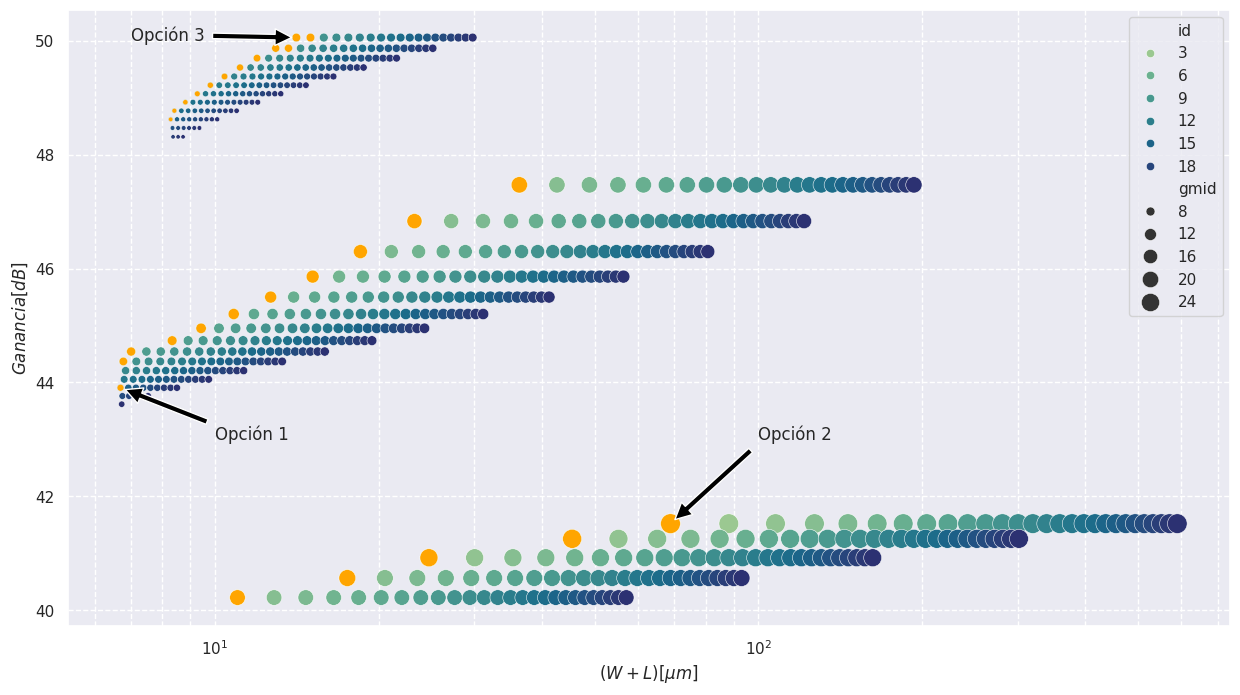

In [355]:
fig, axs = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=example_df[mask], x="area", y="gain", hue="id", size="gmid", palette="crest", sizes=(10, 200))
sns.scatterplot(data=example_df[mask][mask_pareto], x="area", y="gain", size="gmid", legend=False, color="orange", sizes=(10, 200))
plt.xscale("log")
plt.savefig('sd_examplegain.svg', format='svg', dpi=1200)
#plt.set_title(r"Frecuencia de tránsito sky130_nmos_01v8", fontsize=15)
plt.xlabel(r"$(W+L) [\mu m]$")
plt.ylabel(r"$Ganancia [dB]$")
plt.grid(linestyle = "dashed", which="both")

plt.annotate('Opción 3', xy=(14.11101199392914, 50.059683703100355), xytext=(7, 50),
             arrowprops={"facecolor":'black', "shrink":0.05},
            )

plt.annotate('Opción 1', xy=(6.6975189868863305, 43.90731935519714), xytext=(10, 43),
             arrowprops={"facecolor":'black', "shrink":0.05},
            )

plt.annotate('Opción 2', xy=(68.89841067122586, 41.52023292554789), xytext=(100, 43),
             arrowprops={"facecolor":'black', "shrink":0.05},
            )

In [359]:
a = example_df[mask][mask_pareto].sort_values(by=["gain", "area"], ascending = [False, True])
a

,gm,gds_2,gdsid,gds,gain,id,gmid,W,L,area,gbw,vgs,cgg,fT
9852,0.000070,9.289994e-08,0.024702,2.189105e-07,50.059684,8.862069,7.865307,11.782059,3.2,14.982059,11.093559,0.807071,1.057462e-13,104.907367
9851,0.000065,9.289994e-08,0.024702,2.027265e-07,50.059684,8.206897,7.865307,10.911012,3.2,14.111012,10.273413,0.807071,9.792842e-14,104.907367
9883,0.000069,1.067203e-07,0.023435,2.230351e-07,49.871774,9.517241,7.302151,10.449514,3.2,13.649514,11.060685,0.832323,9.481382e-14,116.656885
9882,0.000065,1.067203e-07,0.023435,2.076812e-07,49.871774,8.862069,7.302151,9.730163,3.2,12.930163,10.299261,0.832323,8.828678e-14,116.656885
9913,0.000065,1.213084e-07,0.022294,2.121766e-07,49.697621,9.517241,6.808751,8.745339,3.2,11.945339,10.313324,0.857576,8.006654e-14,128.809409
9944,0.000065,1.366612e-07,0.021267,2.163360e-07,49.533266,10.172414,6.373354,7.915049,3.2,11.115049,10.318396,0.882828,7.304037e-14,141.269766
9975,0.000065,1.527807e-07,0.020342,2.202543e-07,49.375744,10.827586,5.986597,7.208186,3.2,10.408186,10.316486,0.908081,6.696237e-14,154.063928
10006,0.000065,1.696753e-07,0.019508,2.240082e-07,49.222703,11.482759,5.640957,6.601084,3.2,9.801084,10.309063,0.933333,6.169115e-14,167.107646
10037,0.000065,1.873584e-07,0.018756,2.276591e-07,49.072301,12.137931,5.330346,6.075498,3.2,9.275498,10.297225,0.958586,5.707308e-14,180.421743
10068,0.000065,2.058474e-07,0.018077,2.312568e-07,48.923096,12.793103,5.049790,5.617188,3.2,8.817188,10.281805,0.983838,5.301678e-14,193.934940


In [263]:
20*np.log10(17.3)

np.float64(24.760922062575908)

In [ ]:
activeload = Transistor(
            "../../LUTs/IHP_LUT_hv.npy",
            "pmos",
            0,
            -1.3,
            (-3.3, -0.1, 0.01),
            lengths,
            ['length', 'vgs'],
            [
                lengths,
                -1.3,
            ],
        )

In [ ]:
W_activeload = 20e-6/activeload.jd
L_activeload = lengths
gmid_activeload = activeload.gmid
gm_activeload = gmid_activeload*20e-6
gds_activeload = (activeload.gds/activeload.id)*20e-6

In [ ]:
print(W_activeload[1])
print(L_activeload[1])
print(gmid_activeload[1])
print(gm_activeload[1])
print(gds_activeload [1])

In [ ]:
cm_transistor = Transistor(
            "../../LUTs/IHP_LUT_hv.npy",
            "nmos",
            0,
            0.8,
            (0.1, 3.3, 0.01),
            lengths,
            ['length', 'vgs'],
            [
                lengths,
                0.8,
            ],
        )

In [ ]:
cm_transistor.gmid

In [ ]:
cm_transistor.gmid*40e-6

In [ ]:
40e-6/cm_transistor.jd

In [ ]:
(cm_transistor.gds/cm_transistor.id)*40e-6

In [ ]:
(1/(gds_activeload[1]+a["gds"].values[0]))*a["gm"].values[0]

In [ ]:
20*np.log10(93.53256349)

In [328]:
sim_1 = pd.read_csv('../sstadex/simulations/sd_example1.csv', sep="\s+", names = ["frec", "gain"])  
sim_2 = pd.read_csv('../sstadex/simulations/sd_example2.csv', sep="\s+", names = ["frec", "gain"])  
sim_3 = pd.read_csv('../sstadex/simulations/sd_example3.csv', sep="\s+", names = ["frec", "gain"])  

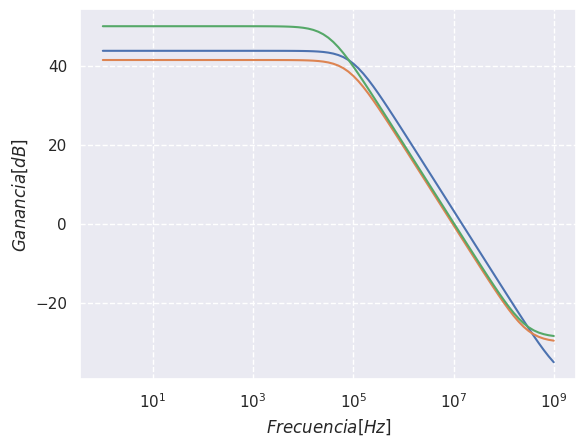

In [356]:
sns.lineplot(data=sim_1, x = "frec", y="gain")
sns.lineplot(data=sim_2, x = "frec", y="gain")
sns.lineplot(data=sim_3, x = "frec", y="gain")
plt.xscale("log")
plt.grid(linestyle = "dashed", which="both")
plt.xlabel(r"$Frecuencia [Hz]$")
plt.ylabel(r"$Ganancia [dB]$")

plt.savefig('sd_examplesim.svg', format='svg', dpi=1200)

In [ ]:
# x= 0.4787(100M)/(1.2-0.4787)